In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install darts

In [210]:
url = "C:/Users/Manan/OneDrive/Desktop/Sugarcane production data.xlsx"
df = pd.read_excel(url,index_col = 'Year',parse_dates = True)
df['prod_diff1'] = df.iloc[:,1].diff(periods = 1 )
import pandas as pd

start_date = '1950'
end_date = '2012'

datetime_index = pd.date_range(start=start_date, end=end_date, freq='Y')  # 'D' for daily frequenc
print(datetime_index)

DatetimeIndex(['1950-12-31', '1951-12-31', '1952-12-31', '1953-12-31',
               '1954-12-31', '1955-12-31', '1956-12-31', '1957-12-31',
               '1958-12-31', '1959-12-31', '1960-12-31', '1961-12-31',
               '1962-12-31', '1963-12-31', '1964-12-31', '1965-12-31',
               '1966-12-31', '1967-12-31', '1968-12-31', '1969-12-31',
               '1970-12-31', '1971-12-31', '1972-12-31', '1973-12-31',
               '1974-12-31', '1975-12-31', '1976-12-31', '1977-12-31',
               '1978-12-31', '1979-12-31', '1980-12-31', '1981-12-31',
               '1982-12-31', '1983-12-31', '1984-12-31', '1985-12-31',
               '1986-12-31', '1987-12-31', '1988-12-31', '1989-12-31',
               '1990-12-31', '1991-12-31', '1992-12-31', '1993-12-31',
               '1994-12-31', '1995-12-31', '1996-12-31', '1997-12-31',
               '1998-12-31', '1999-12-31', '2000-12-31', '2001-12-31',
               '2002-12-31', '2003-12-31', '2004-12-31', '2005-12-31',
      

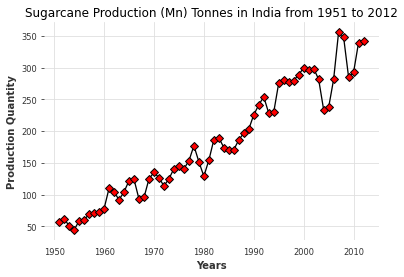

In [212]:
plt.plot(datetime_index,df.iloc[0:62,1],marker='D',color='black', markerfacecolor='red', label='Data Points')
plt.xlabel('Years')
plt.ylabel('Production Quantity')
plt.title('Sugarcane Production (Mn) Tonnes in India from 1951 to 2012')
plt.show()

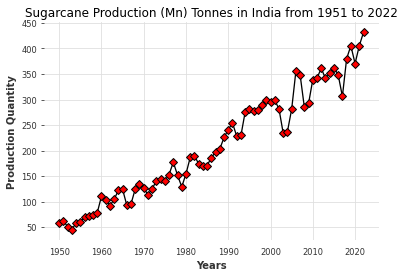

In [214]:
plt.plot(df.index,df.iloc[:,1],marker='D',color='black', markerfacecolor='red', label='Data Points')
plt.xlabel('Years')
plt.ylabel('Production Quantity')
plt.title('Sugarcane Production (Mn) Tonnes in India from 1951 to 2022')
plt.show()

# FIRST ORDER DIFFERENCING:


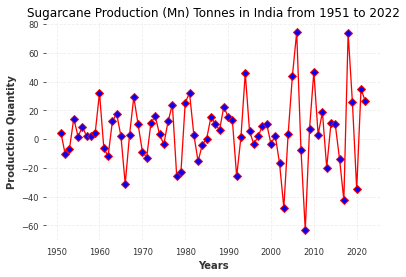

<Figure size 432x288 with 0 Axes>

In [216]:
plt.plot(df.index, df['prod_diff1'], marker='D', color='red', markerfacecolor='blue', label='Data Points')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel('Years')
plt.ylabel('Production Quantity')
plt.title('Sugarcane Production (Mn) Tonnes in India from 1951 to 2022')
plt.show()
plt.savefig('Sugarcane Production.png')  

plt.show()

# AUGMENTED DICKEY-FULLER TEST

NULL HYPOTHESIS : Data is non-stationary 



ALTERNATIVE HYPOTHESIS : Data is Stationery

In [156]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df.iloc[1:62,2])

print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
import numpy as np
import pandas as pd
import statsmodels.api as sm

data = df.iloc[1:63,2]

#first-order differences
diff_data = np.diff(data)

# Fit model
X = sm.add_constant(data[:-1])  # Lagged variable
y = diff_data
model = sm.OLS(y, X)
results = model.fit()

gamma_hat = results.params[1]
se_gamma_hat = results.bse[1]

DF = gamma_hat / se_gamma_hat
print("Test Statistic (DF):", DF)
from scipy.stats import t

nobs = len(y)
at = nobs - 2 

alpha = 0.05
t_critical = t.ppf(1 - alpha / 2, at)

# Calculate the p-value
p_value = 2 * (1 - t.cdf(abs(DF), at))

print("p-value:", p_value)


ADF Statistic: -3.4168902455341983
p-value: 0.010396384740285048
Critical Values:
	1%: -3.560
	5%: -2.918
	10%: -2.597
Test Statistic (DF): -6.487055768089026
p-value: 1.9849608401401042e-08


Hence since the p_value is 1.9849608401401042e-08, we fail to accept the null hypothesis at 1% significance. Hence, that the alternative
hypothesis is true i.e. the series is stationary in its mean and variance.

# CALCULATING  ACF AND PACF

In [157]:
import pandas as pd
from statsmodels.tsa.stattools import acf, pacf

ts = df.iloc[1:62,2]
# Calculate ACF
acf_values, acf_confint = acf(ts, nlags=20, alpha=0.02)

# Calculate PACF
pacf_values, pacf_confint = pacf(ts, nlags=20, alpha=0.02)

# Create DataFrames for ACF and PACF results
acf_df = pd.DataFrame({'lag': range(len(acf_values)), 'ACF': acf_values, 
                       'ACF Lower Confidence Interval': acf_confint[:, 0], 
                       'ACF Upper Confidence Interval': acf_confint[:, 1]})
pacf_df = pd.DataFrame({'lag': range(len(pacf_values)), 'PACF': pacf_values, 
                        'PACF Lower Confidence Interval': pacf_confint[:, 0], 
                        'PACF Upper Confidence Interval': pacf_confint[:, 1]})

# Print ACF table
print("ACF Table:")
print(acf_df)

# Print PACF table
print("\n\nPACF Table:")
print(pacf_df)


ACF Table:
    lag       ACF  ACF Lower Confidence Interval  \
0     0  1.000000                       1.000000   
1     1  0.164688                      -0.133170   
2     2 -0.633905                      -0.939735   
3     3 -0.337777                      -0.743774   
4     4  0.230413                      -0.199794   
5     5  0.275525                      -0.165495   
6     6 -0.091727                      -0.547763   
7     7 -0.109290                      -0.566960   
8     8  0.068883                      -0.391096   
9     9  0.004944                      -0.455950   
10   10 -0.101709                      -0.562607   
11   11 -0.060471                      -0.523356   
12   12  0.130168                      -0.333417   
13   13  0.089565                      -0.377251   
14   14 -0.147292                      -0.615631   
15   15 -0.130493                      -0.602924   
16   16  0.089279                      -0.386339   
17   17  0.139955                      -0.337148   
1

# PLOTTING ACF AND PACF MODEL

Text(0.5, 1.0, 'Partial Autocorrelation Function (PACF)')

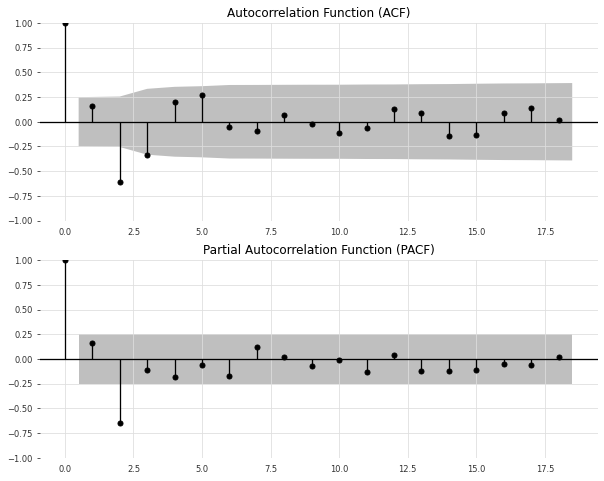

In [158]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
ts = df.iloc[1:63,2]
plot_acf(ts, ax=axes[0])
axes[0].set_title('Autocorrelation Function (ACF)')

# Plot the partial autocorrelation function (PACF) on the second subplot
plot_pacf(ts, ax=axes[1])
axes[1].set_title('Partial Autocorrelation Function (PACF)')

# What is best fit ARIMA Model?

Computing using AIC and BIC tests

In [159]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

ts = df.iloc[0:62, 1]
p_values = range(0, 3)  # AR 
d_values = range(0, 2)  # Differencing
q_values = range(0, 3)  # MA 

best_aic = float('inf')
best_bic = float('inf')
best_aicc = float('inf')
best_model_aic = None
best_model_bic = None
best_model_aicc = None

for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p, d, q)
            try:
                model = ARIMA(ts, order=order)
                model_fit = model.fit()
                
                aic = model_fit.aic
                bic = model_fit.bic
                
                
                log_likelihood = model_fit.llf
                
                k = len(model_fit.params)
                n = len(ts)
                aicc = aic + (2 * k * (k + 1)) / (n - k - 1)
                
                if aic < best_aic:
                    best_aic = aic
                    best_model_aic = model_fit
                if bic < best_bic:
                    best_bic = bic
                    best_model_bic = model_fit
                if aicc < best_aicc:
                    best_aicc = aicc
                    best_model_aicc = model_fit
                print(f'ARIMA{order} - AIC: {aic:.2f}, BIC: {bic:.2f}, Log-Likelihood: {log_likelihood:.2f}, AICc: {aicc:.2f}')
            except:
                continue

print(f'\nBest ARIMA model by AIC - AIC: {best_aic:.2f}, BIC: {best_model_aic.bic:.2f}')
print(f'Best ARIMA model by BIC - AIC: {best_model_bic.aic:.2f}, BIC: {best_bic:.2f}')
print(f'Best ARIMA model by AICc - AIC: {best_model_aicc.aic:.2f}, BIC: {best_aicc:.2f}')


C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-

ARIMA(0, 0, 0) - AIC: 735.08, BIC: 739.34, Log-Likelihood: -365.54, AICc: 735.29
ARIMA(0, 0, 1) - AIC: 660.00, BIC: 666.38, Log-Likelihood: -327.00, AICc: 660.42
ARIMA(0, 0, 2) - AIC: 614.89, BIC: 623.39, Log-Likelihood: -303.44, AICc: 615.59
ARIMA(0, 1, 0) - AIC: 551.71, BIC: 553.82, Log-Likelihood: -274.85, AICc: 551.77
ARIMA(0, 1, 1) - AIC: 536.86, BIC: 541.08, Log-Likelihood: -266.43, AICc: 537.06
ARIMA(0, 1, 2) - AIC: 529.85, BIC: 536.18, Log-Likelihood: -261.93, AICc: 530.26


C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-

ARIMA(1, 0, 0) - AIC: 567.78, BIC: 574.16, Log-Likelihood: -280.89, AICc: 568.19
ARIMA(1, 0, 1) - AIC: 551.73, BIC: 560.24, Log-Likelihood: -271.87, AICc: 552.44


C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-

ARIMA(1, 0, 2) - AIC: 546.18, BIC: 556.82, Log-Likelihood: -268.09, AICc: 547.25
ARIMA(1, 1, 0) - AIC: 551.20, BIC: 555.42, Log-Likelihood: -273.60, AICc: 551.40
ARIMA(1, 1, 1) - AIC: 536.81, BIC: 543.15, Log-Likelihood: -265.41, AICc: 537.23


C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-

ARIMA(1, 1, 2) - AIC: 530.80, BIC: 539.24, Log-Likelihood: -261.40, AICc: 531.50
ARIMA(2, 0, 0) - AIC: 566.86, BIC: 575.37, Log-Likelihood: -279.43, AICc: 567.56


C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-

ARIMA(2, 0, 1) - AIC: 552.24, BIC: 562.88, Log-Likelihood: -271.12, AICc: 553.31
ARIMA(2, 0, 2) - AIC: 547.12, BIC: 559.89, Log-Likelihood: -267.56, AICc: 548.65
ARIMA(2, 1, 0) - AIC: 519.70, BIC: 526.03, Log-Likelihood: -256.85, AICc: 520.11


C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-

ARIMA(2, 1, 1) - AIC: 521.45, BIC: 529.89, Log-Likelihood: -256.72, AICc: 522.15
ARIMA(2, 1, 2) - AIC: 523.17, BIC: 533.73, Log-Likelihood: -256.59, AICc: 524.24

Best ARIMA model by AIC - AIC: 519.70, BIC: 526.03
Best ARIMA model by BIC - AIC: 519.70, BIC: 526.03
Best ARIMA model by AICc - AIC: 519.70, BIC: 520.11


C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


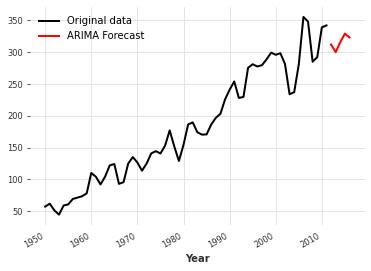

In [160]:
from darts.models import ARIMA
from darts import TimeSeries
model = ARIMA(2,1,0)
series = TimeSeries.from_series(ts)
model.fit(series)

# Make predictions
forecast = model.predict(n=5)

# Plot results
series.plot(label='Original data')
forecast.plot(label='ARIMA Forecast', color='red')
plt.legend()
plt.show()

# ARIMA PREDICTIONS AND CONFIDENCE INTERVALS

In [161]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
ts = df.iloc[0:63,1]
model = ARIMA(ts, order=(2, 1, 0))
mf = model.fit()

forecast_steps = 5
forecast = mf.forecast(steps=forecast_steps, alpha=0.02)
residuals = mf.resid

forecast_result = mf.get_forecast(steps=forecast_steps, alpha=12)
forecast_values = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()
print('The forecast values for the next five years is\n',forecast)
print('The confidence intervals for the forecasted values are\n', conf_int )


The forecast values for the next five years is
 2013-01-01    365.341950
2014-01-01    355.691622
2015-01-01    350.058311
2016-01-01    353.895131
2017-01-01    358.433214
Freq: AS-JAN, Name: predicted_mean, dtype: float64
The confidence intervals for the forecasted values are
             lower Production   upper Production 
2013-01-01         331.748391         398.935509
2014-01-01         299.991268         411.391976
2015-01-01         287.606613         412.510008
2016-01-01         289.256006         418.534257
2017-01-01         290.014792         426.851637


C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


# FAILED AUTHOR's EQUATION FOR ANALYSIS

In [207]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

ts = df.iloc[0:63, 1]

u = np.mean(ts)

model = ARIMA(ts, order=(2, 1, 0))
mf = model.fit()

print("Model Parameters:", mf.params)


B1, B2 = mf.params[:2]


difference_series = np.diff(ts)

forecast_steps = 5
forecast_values = []
for i in range(1, forecast_steps + 1):
    Zt_minus_1 = difference_series[-1]
    Zt_minus_2 = difference_series[-2]
    forecast_value = u + (B1 * (Zt_minus_1 - u) + B2 * (Zt_minus_2 - u))
    forecast_values.append(forecast_value)
    # Update difference series for the next forecast step
    difference_series = np.append(difference_series, forecast_value - u)


print('Forecasted values:')
print(forecast_values)


Model Parameters: ar.L1       0.322567
ar.L2      -0.585881
sigma2    293.775687
dtype: float64
Forecasted values:
[236.7620720636353, 238.43878571902388, 219.11017958837232, 211.89304737174933, 220.88929772017258]


C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [162]:

confidence_levels = [80, 95, 99.5]
percentiles = [(100 - level) / 2 for level in confidence_levels]

low_values = []
high_values = []

for i in range(len(conf_int)):
    low_values.append([forecast_values[i] - np.percentile(residuals, p) for p in percentiles])
    high_values.append([forecast_values[i] + np.percentile(residuals, 100 - p) for p in percentiles])
for i, level in enumerate(confidence_levels):
    print(f'Confidence Level {level}%:')
    for j in range(len(conf_int)):
        print(f'Forecasted Value {j+1}:')
        print(f'  Low: {low_values[j][i]:.2f}')
        print(f'  High: {high_values[j][i]:.2f}')




Confidence Level 80%:
Forecasted Value 1:
  Low: 378.69
  High: 388.34
Forecasted Value 2:
  Low: 369.04
  High: 378.69
Forecasted Value 3:
  Low: 363.41
  High: 373.05
Forecasted Value 4:
  Low: 367.24
  High: 376.89
Forecasted Value 5:
  Low: 371.78
  High: 381.43
Confidence Level 95%:
Forecasted Value 1:
  Low: 388.75
  High: 415.94
Forecasted Value 2:
  Low: 379.10
  High: 406.29
Forecasted Value 3:
  Low: 373.46
  High: 400.66
Forecasted Value 4:
  Low: 377.30
  High: 404.49
Forecasted Value 5:
  Low: 381.84
  High: 409.03
Confidence Level 99.5%:
Forecasted Value 1:
  Low: 403.84
  High: 426.58
Forecasted Value 2:
  Low: 394.18
  High: 416.93
Forecasted Value 3:
  Low: 388.55
  High: 411.29
Forecasted Value 4:
  Low: 392.39
  High: 415.13
Forecasted Value 5:
  Low: 396.93
  High: 419.67


In [163]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

p = 2  
d = 1  
q = 0  

model = ARIMA(ts, order=(p, d, q))

mf = model.fit()

forecast_steps = 5

forecast_values = np.zeros(forecast_steps)
for i in range(forecast_steps):

    forecast_result = mf.forecast(steps=1)
    forecast_values[i] = forecast_result[0]
    

    new_observation = np.array([forecast_result[0]])
    mf = mf.append(new_observation)

print('Manually predicted values:', forecast_values)


C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


Manually predicted values: [365.34195005 355.69162207 350.05831065 353.89513132 358.4332142 ]


# VISUALIZING RESIDUALS OF FITTED ARIMA(2,1,0) MODEL

LINE PLOT

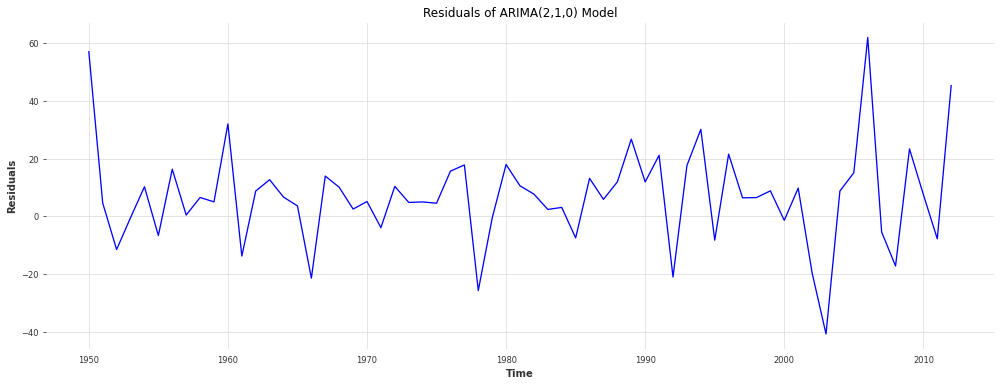

In [164]:

plt.figure(figsize=(17, 6))
plt.plot(residuals, color='blue')
plt.title('Residuals of ARIMA(2,1,0) Model')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

HISTOGRAM

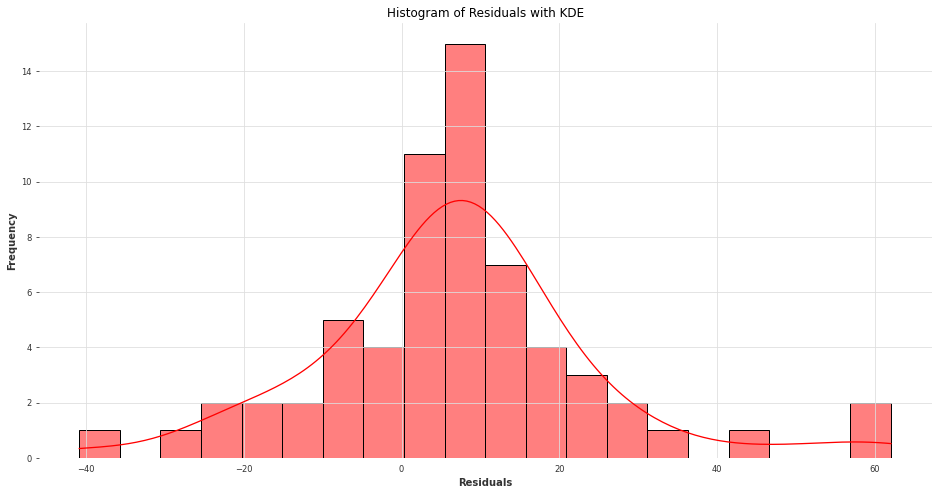

In [165]:
import seaborn as sns
plt.figure(figsize=(16, 8))
sns.histplot(residuals, bins=20, kde=True, color='red', edgecolor='black')
plt.title('Histogram of Residuals with KDE')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

QQ PLOT

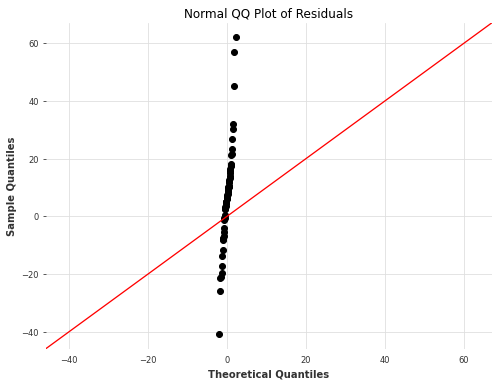

In [166]:
import statsmodels.api as sm
fig, ax = plt.subplots(figsize=(8, 6))
sm.qqplot(residuals, line='45', ax=ax)
ax.set_title('Normal QQ Plot of Residuals')
plt.show()

# PLOTTING ACF AND PACF OF FORECAST ERRORS:

Text(0.5, 1.0, 'Partial Autocorrelation Function (PACF)')

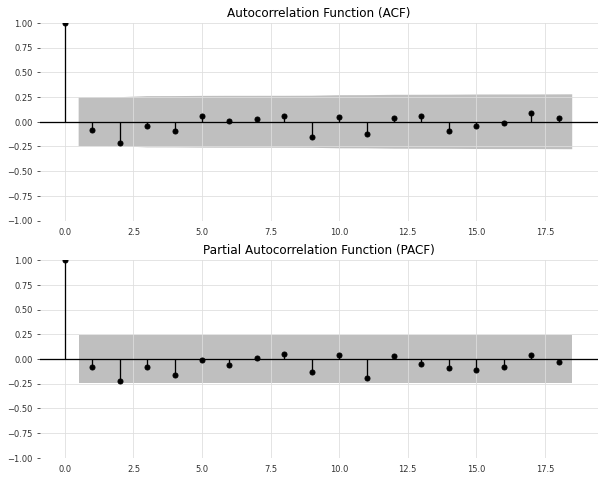

In [167]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
ts = residuals
plot_acf(ts, ax=axes[0])
axes[0].set_title('Autocorrelation Function (ACF)')

plot_pacf(ts, ax=axes[1])
axes[1].set_title('Partial Autocorrelation Function (PACF)')

# BOX LJUNG AND BOX PIERCE TEST

In [168]:
import statsmodels.api as sm

# Assuming you have computed residuals and assigned them to the variable 'residuals'

# Perform the Ljung-Box test
ljung_box_results = sm.stats.acorr_ljungbox(residuals, lags=20, boxpierce=True)

print(ljung_box_results)
gf = pd.DataFrame(ljung_box_results)


      lb_stat  lb_pvalue   bp_stat  bp_pvalue
1    0.482149   0.487450  0.459896   0.497672
2    3.448420   0.178314  3.243627   0.197540
3    3.559672   0.313105  3.346321   0.341247
4    4.189805   0.380927  3.918289   0.417177
5    4.394482   0.494124  4.100923   0.534979
6    4.396380   0.623199  4.102588   0.662796
7    4.435396   0.728482  4.136201   0.763963
8    4.728355   0.786176  4.384090   0.820914
9    6.432298   0.695993  5.799673   0.759788
10   6.602014   0.762407  5.938057   0.820440
11   7.838139   0.727726  6.926957   0.804967
12   7.977268   0.786904  7.036120   0.855217
13   8.257671   0.826418  7.251814   0.888712
14   8.962937   0.833417  7.783476   0.900299
15   9.129230   0.870664  7.906278   0.927485
16   9.150856   0.907071  7.921915   0.951157
17   9.805368   0.911573  8.385107   0.957604
18   9.939247   0.933871  8.477793   0.970642
19  10.042133   0.951899  8.547439   0.980265
20  10.307376   0.962250  8.722908   0.985900


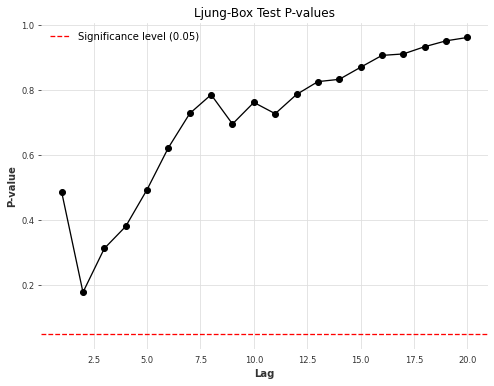

In [169]:
# Plot the p-values
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(gf.iloc[:,1]) + 1), gf.iloc[:,1], marker='o', linestyle='-')
plt.xlabel('Lag')
plt.ylabel('P-value')
plt.title('Ljung-Box Test P-values')
plt.axhline(y=0.05, color='r', linestyle='--', label='Significance level (0.05)')
plt.legend()
plt.show()

# PROJECT EXTENSION 1:

We try to predict the way same using values till 2017 to predict the values till 2018-2022

# PE1: AUGMENTED DICKEY-FULLER TEST

NULL HYPOTHESIS : Data is non-stationary 

ALTERNATIVE HYPOTHESIS : Data is Stationery

In [170]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df.iloc[1:68,2])

print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
import numpy as np
import pandas as pd
import statsmodels.api as sm
data = df.iloc[1:,2]
diff_data = np.diff(data)

X = sm.add_constant(data[:-1])  
y = diff_data
model = sm.OLS(y, X)
results = model.fit()

gamma_hat = results.params[1]
se_gamma_hat = results.bse[1]
DF = gamma_hat / se_gamma_hat

# Print test statistic
print("Test Statistic (DF):", DF)

ADF Statistic: -10.284475611523654
p-value: 3.705746002191361e-18
Critical Values:
	1%: -3.535
	5%: -2.907
	10%: -2.591
Test Statistic (DF): -7.907329590803193


Hence since the p_value is less than 0.01, we fail to accept the null hypothesis at 1% significance. Hence, that the alternative
hypothesis is true i.e. the series is stationary in its mean and variance.

In [171]:
import pandas as pd
from statsmodels.tsa.stattools import acf, pacf

ts = df.iloc[1:68,2]
# Calculate ACF
acf_values, acf_confint = acf(ts, nlags=20, alpha=0.02)

# Calculate PACF
pacf_values, pacf_confint = pacf(ts, nlags=20, alpha=0.02)

# Create DataFrames for ACF and PACF results
acf_df = pd.DataFrame({'lag': range(len(acf_values)), 'ACF': acf_values, 
                       'ACF Lower Confidence Interval': acf_confint[:, 0], 
                       'ACF Upper Confidence Interval': acf_confint[:, 1]})
pacf_df = pd.DataFrame({'lag': range(len(pacf_values)), 'PACF': pacf_values, 
                        'PACF Lower Confidence Interval': pacf_confint[:, 0], 
                        'PACF Upper Confidence Interval': pacf_confint[:, 1]})

# Print ACF table
print("ACF Table:")
print(acf_df)

# Print PACF table
print("\n\nPACF Table:")
print(pacf_df)

ACF Table:
    lag       ACF  ACF Lower Confidence Interval  \
0     0  1.000000                       1.000000   
1     1  0.155402                      -0.128807   
2     2 -0.558373                      -0.849364   
3     3 -0.325411                      -0.692894   
4     4  0.209584                      -0.180481   
5     5  0.282099                      -0.116958   
6     6 -0.076271                      -0.491124   
7     7 -0.213119                      -0.629102   
8     8  0.077233                      -0.347478   
9     9  0.110130                      -0.315714   
10   10 -0.075810                      -0.503949   
11   11 -0.175958                      -0.605180   
12   12  0.041639                      -0.393371   
13   13  0.115725                      -0.319606   
14   14 -0.047134                      -0.484943   
15   15 -0.088687                      -0.526905   
16   16  0.088901                      -0.350765   
17   17  0.141481                      -0.299635   
1

Text(0.5, 1.0, 'Partial Autocorrelation Function (PACF)')

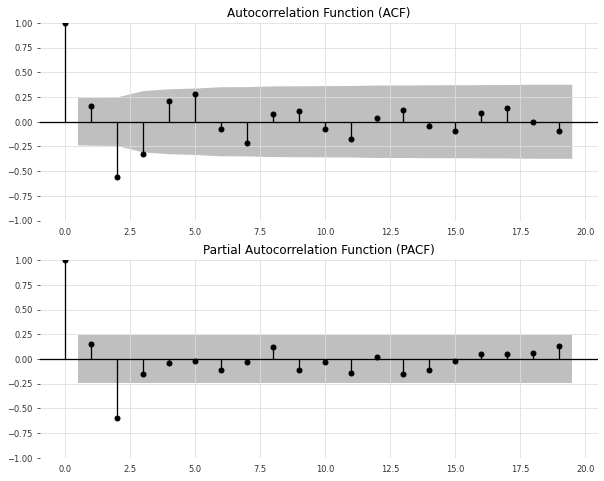

In [172]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
ts = df.iloc[1:68,2]
plot_acf(ts, ax=axes[0])
axes[0].set_title('Autocorrelation Function (ACF)')

# Plot the partial autocorrelation function (PACF) on the second subplot
plot_pacf(ts, ax=axes[1])
axes[1].set_title('Partial Autocorrelation Function (PACF)')

In [173]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

ts = df.iloc[0:68, 1]
p_values = range(0, 3)  # AR 
d_values = range(0, 2)  # Differencing
q_values = range(0, 3)  # MA 

best_aic = float('inf')
best_bic = float('inf')
best_aicc = float('inf')
best_model_aic = None
best_model_bic = None
best_model_aicc = None

for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p, d, q)
            try:
                model = ARIMA(ts, order=order)
                model_fit = model.fit()
                
                aic = model_fit.aic
                bic = model_fit.bic
                
                log_likelihood = model_fit.llf
            
                k = len(model_fit.params)
                n = len(ts)
                aicc = aic + (2 * k * (k + 1)) / (n - k - 1)
                
                if aic < best_aic:
                    best_aic = aic
                    best_model_aic = model_fit
                if bic < best_bic:
                    best_bic = bic
                    best_model_bic = model_fit
                if aicc < best_aicc:
                    best_aicc = aicc
                    best_model_aicc = model_fit
                print(f'ARIMA{order} - AIC: {aic:.2f}, BIC: {bic:.2f}, Log-Likelihood: {log_likelihood:.2f}, AICc: {aicc:.2f}')
            except:
                continue

print(f'\nBest ARIMA model by AIC - AIC: {best_aic:.2f}, BIC: {best_model_aic.bic:.2f}')
print(f'Best ARIMA model by BIC - AIC: {best_model_bic.aic:.2f}, BIC: {best_bic:.2f}')
print(f'Best ARIMA model by AICc - AIC: {best_model_aicc.aic:.2f}, BIC: {best_aicc:.2f}')



C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-

ARIMA(0, 0, 0) - AIC: 817.99, BIC: 822.43, Log-Likelihood: -406.99, AICc: 818.17
ARIMA(0, 0, 1) - AIC: 736.61, BIC: 743.27, Log-Likelihood: -365.30, AICc: 736.98


C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferre

ARIMA(0, 0, 2) - AIC: 686.15, BIC: 695.03, Log-Likelihood: -339.07, AICc: 686.78
ARIMA(0, 1, 0) - AIC: 605.94, BIC: 608.15, Log-Likelihood: -301.97, AICc: 606.00
ARIMA(0, 1, 1) - AIC: 596.78, BIC: 601.18, Log-Likelihood: -296.39, AICc: 596.96
ARIMA(0, 1, 2) - AIC: 591.60, BIC: 598.21, Log-Likelihood: -292.80, AICc: 591.97


C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-

ARIMA(1, 0, 0) - AIC: 621.64, BIC: 628.29, Log-Likelihood: -307.82, AICc: 622.01
ARIMA(1, 0, 1) - AIC: 611.42, BIC: 620.30, Log-Likelihood: -301.71, AICc: 612.05


C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-

ARIMA(1, 0, 2) - AIC: 607.81, BIC: 618.91, Log-Likelihood: -298.91, AICc: 608.78
ARIMA(1, 1, 0) - AIC: 605.52, BIC: 609.93, Log-Likelihood: -300.76, AICc: 605.71
ARIMA(1, 1, 1) - AIC: 597.38, BIC: 603.99, Log-Likelihood: -295.69, AICc: 597.75


C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-

ARIMA(1, 1, 2) - AIC: 592.12, BIC: 600.94, Log-Likelihood: -292.06, AICc: 592.76
ARIMA(2, 0, 0) - AIC: 620.67, BIC: 629.55, Log-Likelihood: -306.34, AICc: 621.31


C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-

ARIMA(2, 0, 1) - AIC: 612.43, BIC: 623.53, Log-Likelihood: -301.22, AICc: 613.40
ARIMA(2, 0, 2) - AIC: 608.37, BIC: 621.68, Log-Likelihood: -298.18, AICc: 609.74


C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-

ARIMA(2, 1, 0) - AIC: 581.28, BIC: 587.89, Log-Likelihood: -287.64, AICc: 581.65
ARIMA(2, 1, 1) - AIC: 583.16, BIC: 591.98, Log-Likelihood: -287.58, AICc: 583.79
ARIMA(2, 1, 2) - AIC: 584.74, BIC: 595.76, Log-Likelihood: -287.37, AICc: 585.71

Best ARIMA model by AIC - AIC: 581.28, BIC: 587.89
Best ARIMA model by BIC - AIC: 581.28, BIC: 587.89
Best ARIMA model by AICc - AIC: 581.28, BIC: 581.65


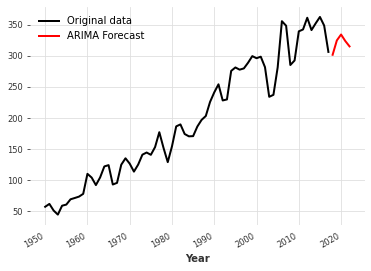

In [174]:
from darts.models import ARIMA
from darts import TimeSeries
model = ARIMA(2,1,0)
series = TimeSeries.from_series(ts)
model.fit(series)

# Make predictions
forecast = model.predict(n=5)

# Plot results
series.plot(label='Original data')
forecast.plot(label='ARIMA Forecast', color='red')
plt.legend()
plt.show()

In [175]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
model = ARIMA(ts, order=(2, 1, 0))
mf = model.fit()

forecast_steps = 5
forecast = mf.forecast(steps=forecast_steps, alpha=0.02)
residuals = mf.resid

forecast_result = mf.get_forecast(steps=forecast_steps, alpha=12)
forecast_values = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()
print('The forecast values for the next five years is\n',forecast)
print('The confidence intervals for the forecasted values are\n', conf_int )


The forecast values for the next five years is
 2018-01-01    301.502220
2019-01-01    324.598095
2020-01-01    334.087002
2021-01-01    323.577489
2022-01-01    314.984213
Freq: AS-JAN, Name: predicted_mean, dtype: float64
The confidence intervals for the forecasted values are
             lower Production   upper Production 
2018-01-01         267.007427         335.997012
2019-01-01         268.111478         381.084713
2020-01-01         271.100715         397.073289
2021-01-01         258.348761         388.806216
2022-01-01         245.668754         384.299673


C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [176]:
confidence_levels = [80, 95, 99.5]
percentiles = [(100 - level) / 2 for level in confidence_levels]

low_values = []
high_values = []

for i in range(len(conf_int)):
    low_values.append([forecast_values[i] - np.percentile(residuals, p) for p in percentiles])
    high_values.append([forecast_values[i] + np.percentile(residuals, 100 - p) for p in percentiles])
for i, level in enumerate(confidence_levels):
    print(f'Confidence Level {level}%:')
    for j in range(len(conf_int)):
        print(f'Forecasted Value {j+1}:')
        print(f'  Low: {low_values[j][i]:.2f}')
        print(f'  High: {high_values[j][i]:.2f}')

Confidence Level 80%:
Forecasted Value 1:
  Low: 320.03
  High: 324.80
Forecasted Value 2:
  Low: 343.12
  High: 347.89
Forecasted Value 3:
  Low: 352.61
  High: 357.38
Forecasted Value 4:
  Low: 342.10
  High: 346.87
Forecasted Value 5:
  Low: 333.51
  High: 338.28
Confidence Level 95%:
Forecasted Value 1:
  Low: 329.08
  High: 350.40
Forecasted Value 2:
  Low: 352.17
  High: 373.50
Forecasted Value 3:
  Low: 361.66
  High: 382.99
Forecasted Value 4:
  Low: 351.15
  High: 372.48
Forecasted Value 5:
  Low: 342.56
  High: 363.88
Confidence Level 99.5%:
Forecasted Value 1:
  Low: 341.30
  High: 363.60
Forecasted Value 2:
  Low: 364.39
  High: 386.70
Forecasted Value 3:
  Low: 373.88
  High: 396.19
Forecasted Value 4:
  Low: 363.37
  High: 385.68
Forecasted Value 5:
  Low: 354.78
  High: 377.08


# VISUALZING RESIDUALS OF FITTED ARIMA(2,1,0) MODEL

LINE PLOT

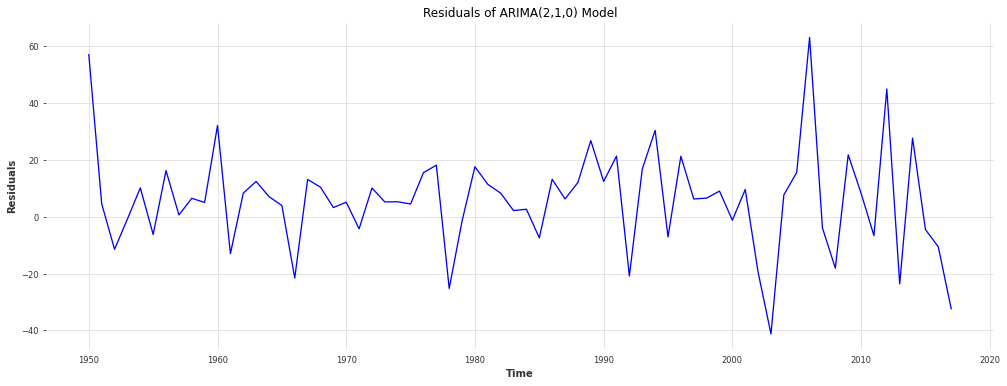

In [177]:
plt.figure(figsize=(17, 6))
plt.plot(residuals, color='blue')
plt.title('Residuals of ARIMA(2,1,0) Model')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

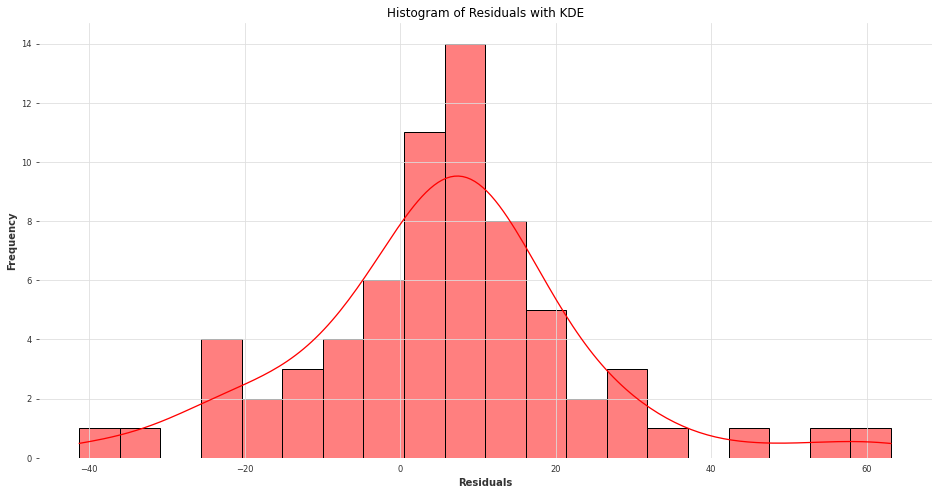

In [178]:
import seaborn as sns
plt.figure(figsize=(16, 8))
sns.histplot(residuals, bins=20, kde=True, color='red', edgecolor='black')
plt.title('Histogram of Residuals with KDE')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

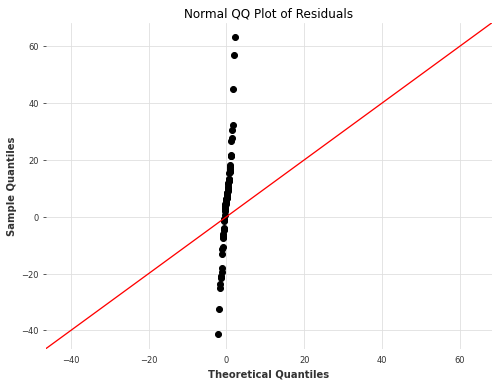

In [179]:
import statsmodels.api as sm
fig, ax = plt.subplots(figsize=(8, 6))
sm.qqplot(residuals, line='45', ax=ax)
ax.set_title('Normal QQ Plot of Residuals')
plt.show()

Text(0.5, 1.0, 'Partial Autocorrelation Function (PACF)')

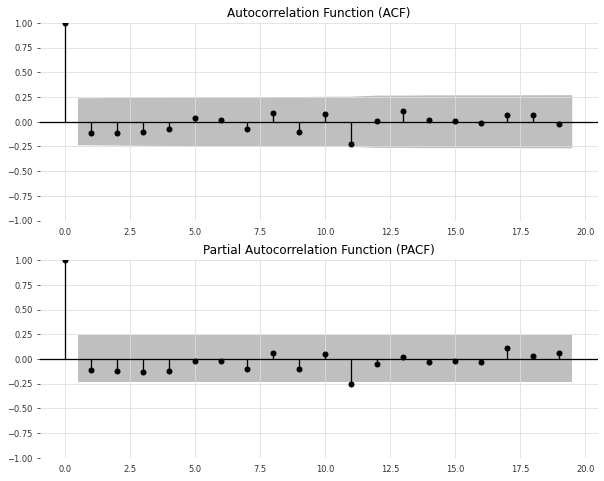

In [180]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
ts = residuals
plot_acf(ts, ax=axes[0])
axes[0].set_title('Autocorrelation Function (ACF)')

# Plot the partial autocorrelation function (PACF) on the second subplot
plot_pacf(ts, ax=axes[1])
axes[1].set_title('Partial Autocorrelation Function (PACF)')

# PE1: BOX LJUNG AND BOX PIERCE TEST

In [181]:
import statsmodels.api as sm

# Assuming you have computed residuals and assigned them to the variable 'residuals'

# Perform the Ljung-Box test
ljung_box_results = sm.stats.acorr_ljungbox(residuals, lags=20, boxpierce=True)

print(ljung_box_results)
gf = pd.DataFrame(ljung_box_results)


      lb_stat  lb_pvalue   bp_stat  bp_pvalue
1    0.902096   0.342220  0.863435   0.352779
2    1.755755   0.415664  1.668313   0.434241
3    2.522990   0.471151  2.380746   0.497229
4    2.950723   0.566105  2.771816   0.596707
5    3.074724   0.688467  2.883416   0.717954
6    3.099938   0.796203  2.905749   0.820580
7    3.525904   0.832474  3.276948   0.858255
8    4.091684   0.848758  3.761902   0.877941
9    4.897350   0.843163  4.440964   0.880071
10   5.352796   0.866400  4.818333   0.902978
11   9.500928   0.575757  8.196098   0.695637
12   9.509202   0.658932  8.202717   0.769095
13  10.511513   0.651666  8.990248   0.773680
14  10.527950   0.722656  9.002927   0.830863
15  10.538939   0.784541  9.011247   0.876929
16  10.559741   0.835811  9.026700   0.912310
17  10.959889   0.858642  9.318237   0.929746
18  11.389434   0.877106  9.625054   0.943460
19  11.445011   0.907960  9.663958   0.960754
20  11.605070   0.928999  9.773713   0.972092


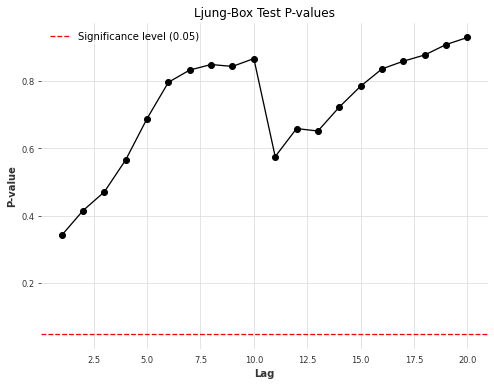

In [182]:
# Plot the p-values
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(gf.iloc[:,1]) + 1), gf.iloc[:,1], marker='o', linestyle='-')
plt.xlabel('Lag')
plt.ylabel('P-value')
plt.title('Ljung-Box Test P-values')
plt.axhline(y=0.05, color='r', linestyle='--', label='Significance level (0.05)')
plt.legend()
plt.show()

# PROJECT EXTENSION 2:

We try to predict the data from 2000-2005, using an ARIMA model from the dataset.

# AUGMENTED DICKEY-FULLER TEST 

NULL HYPOTHESIS : Data is non-stationary 

ALTERNATIVE HYPOTHESIS : Data is Stationery

In [183]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df.iloc[1:54,2])

print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
import numpy as np
import pandas as pd
import statsmodels.api as sm

data = df.iloc[1:,2]

#first-order differences
diff_data = np.diff(data)

# Fit model
X = sm.add_constant(data[:-1])  # Lagged variable
y = diff_data
model = sm.OLS(y, X)
results = model.fit()

gamma_hat = results.params[1]
se_gamma_hat = results.bse[1]

DF = gamma_hat / se_gamma_hat
print("Test Statistic (DF):", DF)
ts = df.iloc[1:54,2]

ADF Statistic: -8.256030577454109
p-value: 5.234418223520683e-13
Critical Values:
	1%: -3.566
	5%: -2.920
	10%: -2.598
Test Statistic (DF): -7.907329590803193


In [184]:
import pandas as pd
from statsmodels.tsa.stattools import acf, pacf

ts = df.iloc[1:54,2]
# Calculate ACF
acf_values, acf_confint = acf(ts, nlags=20, alpha=0.02)

# Calculate PACF
pacf_values, pacf_confint = pacf(ts, nlags=20, alpha=0.02)

# Create DataFrames for ACF and PACF results
acf_df = pd.DataFrame({'lag': range(len(acf_values)), 'ACF': acf_values, 
                       'ACF Lower Confidence Interval': acf_confint[:, 0], 
                       'ACF Upper Confidence Interval': acf_confint[:, 1]})
pacf_df = pd.DataFrame({'lag': range(len(pacf_values)), 'PACF': pacf_values, 
                        'PACF Lower Confidence Interval': pacf_confint[:, 0], 
                        'PACF Upper Confidence Interval': pacf_confint[:, 1]})

# Print ACF table
print("ACF Table:")
print(acf_df)

# Print PACF table
print("\n\nPACF Table:")
print(pacf_df)

ACF Table:
    lag       ACF  ACF Lower Confidence Interval  \
0     0  1.000000                       1.000000   
1     1  0.132099                      -0.187449   
2     2 -0.500623                      -0.825700   
3     3 -0.136688                      -0.532741   
4     4  0.285659                      -0.115182   
5     5  0.191187                      -0.229929   
6     6 -0.230738                      -0.660625   
7     7 -0.108092                      -0.550445   
8     8  0.140226                      -0.304815   
9     9  0.081472                      -0.368059   
10   10 -0.115083                      -0.566119   
11   11 -0.267240                      -0.721264   
12   12  0.009175                      -0.460637   
13   13  0.310145                      -0.159685   
14   14  0.051211                      -0.439079   
15   15 -0.363701                      -0.854537   
16   16 -0.180334                      -0.697957   
17   17  0.238240                      -0.285759   
1

Text(0.5, 1.0, 'Partial Autocorrelation Function (PACF)')

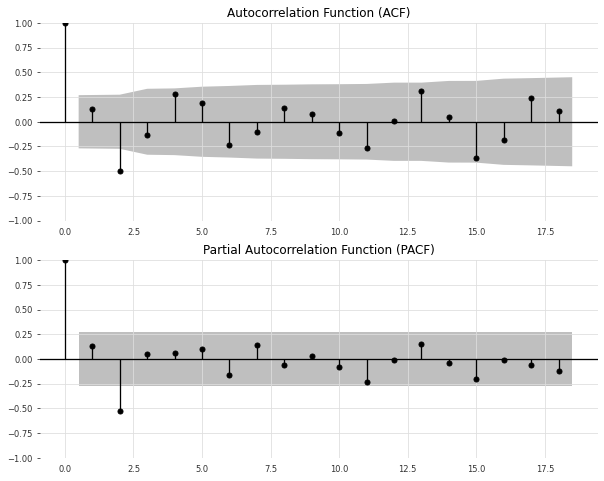

In [185]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
ts = df.iloc[1:54,2]
plot_acf(ts, ax=axes[0])
axes[0].set_title('Autocorrelation Function (ACF)')

# Plot the partial autocorrelation function (PACF) on the second subplot
plot_pacf(ts, ax=axes[1])
axes[1].set_title('Partial Autocorrelation Function (PACF)')

In [186]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

ts = df.iloc[0:54,1]
p_values = range(0, 3)  # AR 
d_values = range(0, 2)  # Differencing
q_values = range(0, 3)  # MA 


best_aic = float('inf')
best_bic = float('inf')
best_model_aic = None
best_model_bic = None


for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p, d, q)
            try:
               
                model = ARIMA(ts, order=order)
                model_fit = model.fit()
                
                
                aic = model_fit.aic
                bic = model_fit.bic
                
                
                if aic < best_aic:
                    best_aic = aic
                    best_model_aic = model_fit
                if bic < best_bic:
                    best_bic = bic
                    best_model_bic = model_fit
                print(f'ARIMA{order} - AIC: {aic:.2f}, BIC: {bic:.2f}')
            except:
                continue

print(f'\nBest ARIMA model by AIC - AIC: {best_aic:.2f}, BIC: {best_model_aic.bic:.2f}')
print(f'Best ARIMA model by BIC - AIC: {best_model_bic.aic:.2f}, BIC: {best_bic:.2f}')


C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-

ARIMA(0, 0, 0) - AIC: 625.41, BIC: 629.39
ARIMA(0, 0, 1) - AIC: 559.58, BIC: 565.54
ARIMA(0, 0, 2) - AIC: 523.38, BIC: 531.34
ARIMA(0, 1, 0) - AIC: 453.34, BIC: 455.31
ARIMA(0, 1, 1) - AIC: 444.93, BIC: 448.87
ARIMA(0, 1, 2) - AIC: 440.84, BIC: 446.75


C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-

ARIMA(1, 0, 0) - AIC: 468.51, BIC: 474.48
ARIMA(1, 0, 1) - AIC: 459.00, BIC: 466.96


C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-

ARIMA(1, 0, 2) - AIC: 456.21, BIC: 466.15
ARIMA(1, 1, 0) - AIC: 453.44, BIC: 457.38
ARIMA(1, 1, 1) - AIC: 443.40, BIC: 449.31


C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-

ARIMA(1, 1, 2) - AIC: 442.82, BIC: 450.70
ARIMA(2, 0, 0) - AIC: 468.10, BIC: 476.05


C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-

ARIMA(2, 0, 1) - AIC: 458.05, BIC: 467.99


C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


ARIMA(2, 0, 2) - AIC: 458.20, BIC: 470.14
ARIMA(2, 1, 0) - AIC: 439.94, BIC: 445.85
ARIMA(2, 1, 1) - AIC: 440.77, BIC: 448.65


C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-

ARIMA(2, 1, 2) - AIC: 442.27, BIC: 452.12

Best ARIMA model by AIC - AIC: 439.94, BIC: 445.85
Best ARIMA model by BIC - AIC: 439.94, BIC: 445.85


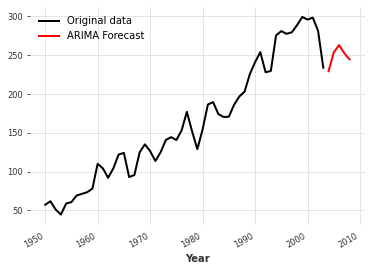

In [187]:
from darts.models import ARIMA
from darts import TimeSeries
model = ARIMA(2,1,0)
series = TimeSeries.from_series(ts)
model.fit(series)

# Make predictions
forecast = model.predict(n=5)

# Plot results
series.plot(label='Original data')
forecast.plot(label='ARIMA Forecast', color='red')
plt.legend()
plt.show()

In [188]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
ts = df.iloc[0:54,1]
model = ARIMA(ts, order=(2, 1, 0))
mf = model.fit()

forecast_steps = 5
forecast = mf.forecast(steps=forecast_steps, alpha=0.02)
residuals = mf.resid

forecast_result = mf.get_forecast(steps=forecast_steps, alpha=12)
forecast_values = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()
print('The forecast values for the next five years is\n',forecast)
print('The confidence intervals for the forecasted values are\n', conf_int )


The forecast values for the next five years is
 2004-01-01    229.388697
2005-01-01    253.692218
2006-01-01    262.977740
2007-01-01    252.580899
2008-01-01    244.659106
Freq: AS-JAN, Name: predicted_mean, dtype: float64
The confidence intervals for the forecasted values are
             lower Production   upper Production 
2004-01-01         201.140788         257.636605
2005-01-01         207.736741         299.647695
2006-01-01         211.419679         314.535800
2007-01-01         198.760962         306.400837
2008-01-01         187.211009         302.107202


C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Manan\anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [189]:
confidence_levels = [80, 95, 99.5]
percentiles = [(100 - level) / 2 for level in confidence_levels]

low_values = []
high_values = []

for i in range(len(conf_int)):
    low_values.append([forecast_values[i] - np.percentile(residuals, p) for p in percentiles])
    high_values.append([forecast_values[i] + np.percentile(residuals, 100 - p) for p in percentiles])
for i, level in enumerate(confidence_levels):
    print(f'Confidence Level {level}%:')
    for j in range(len(conf_int)):
        print(f'Forecasted Value {j+1}:')
        print(f'  Low: {low_values[j][i]:.2f}')
        print(f'  High: {high_values[j][i]:.2f}')


Confidence Level 80%:
Forecasted Value 1:
  Low: 241.76
  High: 248.56
Forecasted Value 2:
  Low: 266.06
  High: 272.87
Forecasted Value 3:
  Low: 275.35
  High: 282.15
Forecasted Value 4:
  Low: 264.95
  High: 271.76
Forecasted Value 5:
  Low: 257.03
  High: 263.83
Confidence Level 95%:
Forecasted Value 1:
  Low: 253.80
  High: 261.29
Forecasted Value 2:
  Low: 278.11
  High: 285.60
Forecasted Value 3:
  Low: 287.39
  High: 294.88
Forecasted Value 4:
  Low: 276.99
  High: 284.49
Forecasted Value 5:
  Low: 269.07
  High: 276.56
Confidence Level 99.5%:
Forecasted Value 1:
  Low: 268.86
  High: 283.13
Forecasted Value 2:
  Low: 293.16
  High: 307.44
Forecasted Value 3:
  Low: 302.45
  High: 316.72
Forecasted Value 4:
  Low: 292.05
  High: 306.32
Forecasted Value 5:
  Low: 284.13
  High: 298.40


# PE2: VISUALIZING RESIDUALS OF FITTED ARIMA(2,1,0) MODEL

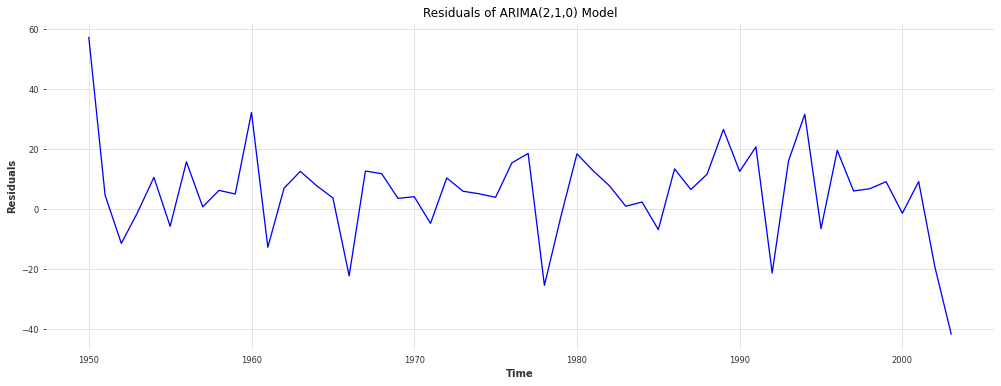

In [190]:
plt.figure(figsize=(17, 6))
plt.plot(residuals, color='blue')
plt.title('Residuals of ARIMA(2,1,0) Model')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

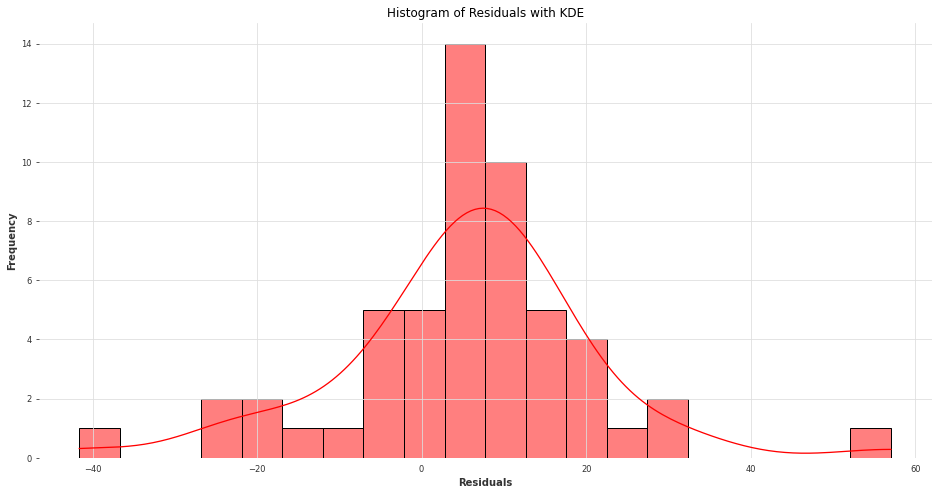

In [191]:
import seaborn as sns
plt.figure(figsize=(16, 8))
sns.histplot(residuals, bins=20, kde=True, color='red', edgecolor='black')
plt.title('Histogram of Residuals with KDE')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# PE 2: PLOTTING ACF AND PACF OF FORECAST ERRORS:

Text(0.5, 1.0, 'Partial Autocorrelation Function (PACF)')

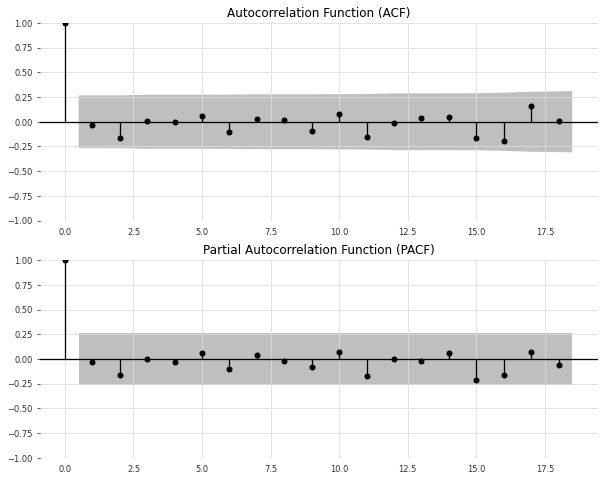

In [192]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
ts = residuals
plot_acf(ts, ax=axes[0])
axes[0].set_title('Autocorrelation Function (ACF)')

# Plot the partial autocorrelation function (PACF) on the second subplot
plot_pacf(ts, ax=axes[1])
axes[1].set_title('Partial Autocorrelation Function (PACF)')

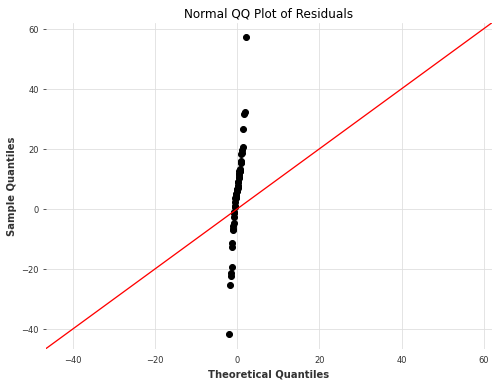

In [193]:
import statsmodels.api as sm
fig, ax = plt.subplots(figsize=(8, 6))
sm.qqplot(residuals, line='45', ax=ax)
ax.set_title('Normal QQ Plot of Residuals')
plt.show()

# PE2: BOX LJUNG AND BOX PIERCE TEST

In [194]:
import statsmodels.api as sm

# Assuming you have computed residuals and assigned them to the variable 'residuals'

# Perform the Ljung-Box test
ljung_box_results = sm.stats.acorr_ljungbox(residuals, lags=20, boxpierce=True)

print(ljung_box_results)
gf = pd.DataFrame(ljung_box_results)

      lb_stat  lb_pvalue   bp_stat  bp_pvalue
1    0.049201   0.824459  0.046565   0.829152
2    1.549055   0.460921  1.439287   0.486926
3    1.553630   0.669949  1.443453   0.695381
4    1.554708   0.816908  1.444416   0.836440
5    1.762018   0.880996  1.625812   0.898110
6    2.395331   0.879993  2.168652   0.903552
7    2.429686   0.932298  2.197486   0.948106
8    2.445925   0.964205  2.210825   0.973857
9    2.999074   0.964332  2.655319   0.976411
10   3.463073   0.968337  3.019890   0.980952
11   5.034872   0.929466  4.226807   0.962806
12   5.047968   0.956358  4.236629   0.978778
13   5.153936   0.971646  4.314213   0.987367
14   5.323015   0.980790  4.434983   0.992229
15   7.463008   0.943506  5.925335   0.980975
16  10.478393   0.840481  7.971490   0.949711
17  12.660168   0.758622  9.413019   0.926407
18  12.661068   0.811302  9.413599   0.949378
19  12.680495   0.854518  9.425741   0.965720
20  12.711753   0.889406  9.444718   0.977161


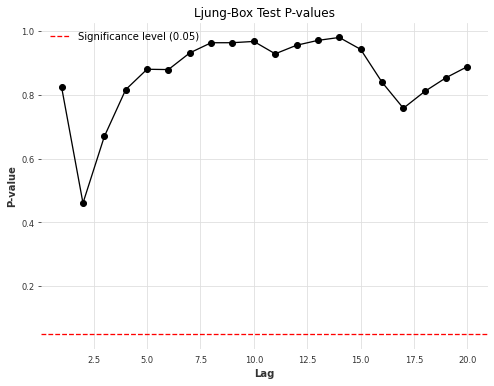

In [195]:
# Plot the p-values
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(gf.iloc[:,1]) + 1), gf.iloc[:,1], marker='o', linestyle='-')
plt.xlabel('Lag')
plt.ylabel('P-value')
plt.title('Ljung-Box Test P-values')
plt.axhline(y=0.05, color='r', linestyle='--', label='Significance level (0.05)')
plt.legend()
plt.show()